In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('car_age_price.csv')

In [4]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [5]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [9]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [7]:
data.shape

(112, 2)

In [8]:
data.Year.unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014], dtype=int64)

In [9]:
data.Price.unique()

array([465000, 755000, 700000, 350000, 425000, 575000, 509999, 500000,
       600000, 475000, 550000, 434999, 650000, 450000, 486000, 545000,
       525000, 396000, 325000, 345000, 341000, 490000, 540000, 595000,
       495000, 400000, 300000, 320000, 409999, 390000, 480000, 520000,
       640000, 375000, 420000], dtype=int64)

# check for null values

In [10]:
data.isna().sum()

Year     0
Price    0
dtype: int64

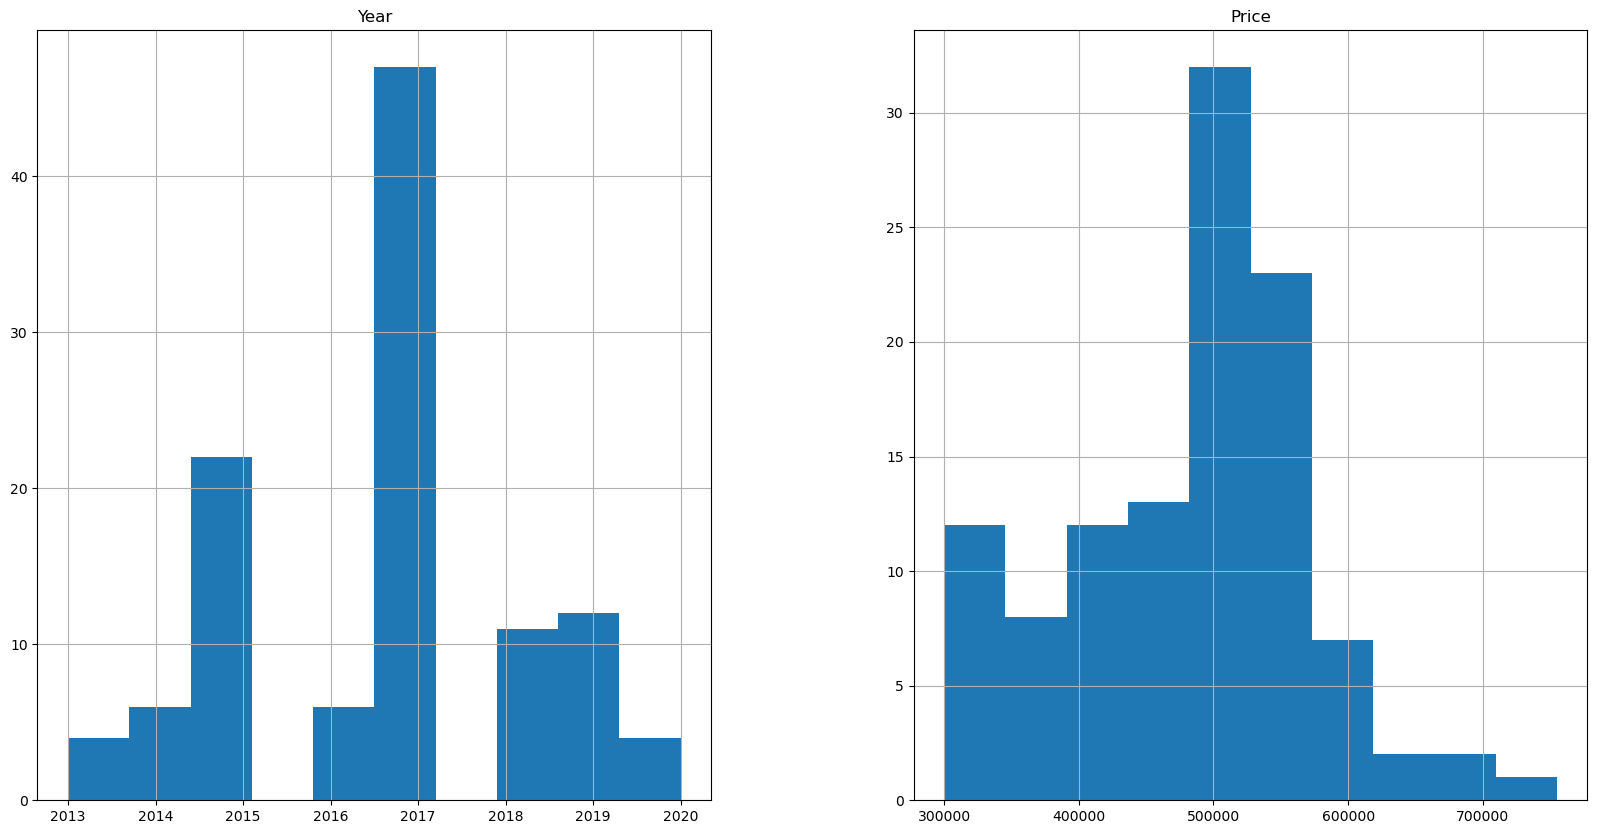

In [11]:
freqgraph=data.select_dtypes(include=['int'])
freqgraph.hist(figsize=(20,10))
plt.show()

<AxesSubplot: >

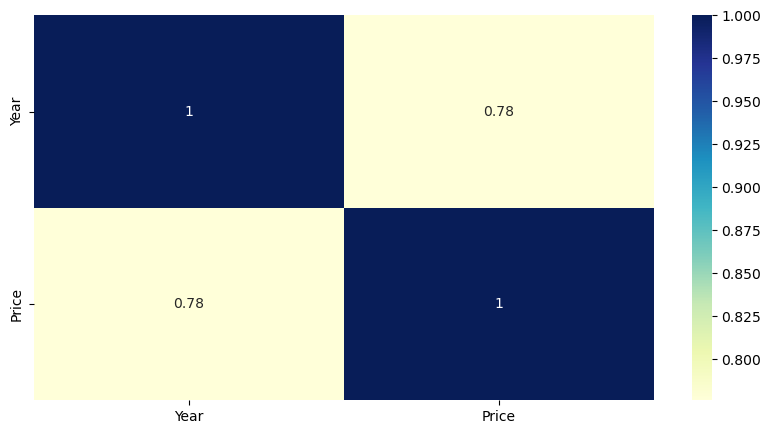

In [12]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corrmatrix,annot=True,cmap='YlGnBu')

# Linear Regression

In [77]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model 

In [78]:
x=data.drop(['Price'],axis=1)
y=data['Price']

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [80]:
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [81]:
from sklearn.metrics import mean_squared_error,r2_score
print ("MSE =",mean_squared_error(y_test,y_pred))
print ("R2 =",r2_score(y_test,y_pred))

MSE = 4326906256.829671
R2 = 0.36759313425902185


In [82]:
model.predict([[2022]])

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([743601.61594504])

# Lasso Regression

In [91]:
from sklearn import datasets
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
model1=lasso.fit(x_train, y_train)
lasso.score(x_test, y_test), lasso.score(x_train, y_train)
y_pred2=model1.predict(x_test)

In [92]:
y_pred2

array([600774.90747294, 505558.59627394, 553166.75187345, 553166.75187345,
       553166.75187345, 410342.28507493, 505558.59627394, 553166.75187345,
       600774.90747294, 600774.90747294, 315125.97387594, 505558.59627394,
       410342.28507493, 648383.06307244, 553166.75187345, 600774.90747294,
       315125.97387594, 410342.28507493, 505558.59627394, 505558.59627394,
       505558.59627394, 505558.59627394, 505558.59627394])

In [74]:
from sklearn.metrics import mean_squared_error,r2_score
print ("MSE =",mean_squared_error(y_test,y_pred2))
print ("R2 =",r2_score(y_test,y_pred2))

MSE = 4326859771.015669
R2 = 0.3675999284778446


In [76]:
model1.predict([[2022]])

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([743599.37427144])

# Both Lasso and Linear Regression gives almost similar output

In [34]:
lasso.coef_

array([47608.1555995])

In [87]:
import statsmodels.api as sm

In [85]:
x_train_sm=sm.add_constant(x_train)
print("Intercept added to the linear regression model -"+str(x_train_sm))

Intercept added to the linear regression model -     const  Year
66     1.0  2017
90     1.0  2017
62     1.0  2017
22     1.0  2015
85     1.0  2015
..     ...   ...
106    1.0  2015
14     1.0  2017
92     1.0  2017
51     1.0  2018
102    1.0  2015

[89 rows x 2 columns]


In [88]:
lasso.intercept_

-95520091.24791843

In [90]:
lr=sm.OLS(y_train, x_train_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     154.0
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           6.03e-21
Time:                        16:14:46   Log-Likelihood:                -1098.9
No. Observations:                  89   AIC:                             2202.
Df Residuals:                      87   BIC:                             2207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.552e+07   7.74e+06    -12.345      0.000   -1.11e+08   -8.01e+07
Year        4.761e+04   3836.979     12.408      0.000       4e+04    5.52e+04
==============================================================================
Omnibus:                        0.900   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.996
Skew:                          -0.217   Prob(JB):                        0.608
Kurtosis:                       2.716   Cond. No.                     2.61e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#fig=plt.gcf()
#fig.set_size_inches(8,5)
#plt.scatter(x_train,y_train)
#plt.plot(x_train,-9.347+4.659*x_train,'r')
#plt.show()